# LOOPING DICE-9

- DITHER: This creates a square of 8 points around the central designated point
- RANDOM: The random selection in a small region around the designated points in the dither list such that no point is selected twice, to produce a more accurate image.
- REQUIRED: 
 - ra_dec: a RA and DEC created using 'SkyCoord'
 - big_offset: an offset for how far around the point you would like to dither. Default is 30*u.arcsec.
 - small_offset: an offset for the defined small region around the points defined in the dither list. Default is 0*u.arcsec
 - loop: a loop for how many times you would like to dither with the DICE_9 pattern. Default is 9 loop.
 - plot: a True or False input to say if user would like to plot coordinates. Default is False (no plot)
- RETURNS: 'SkyCoord' as a list and a plot of coordinate positions

#### - Example: dither_dice9(ra_dec='13 37 00' , '-29 51 56.74' [in SkyCoords], big_offset=0.5\*u.deg, small_offset=0.1\*u.deg, loop=18, plot=True)

<SkyCoord (ICRS): (ra, dec) in deg
    [(204.23466963, -29.86057398), (204.41331909, -29.72311239),
     (204.40297985, -29.90323452), (204.43503744, -30.06308993),
     (204.26742379, -30.04393765), (204.1088119, -30.05096945),
     (204.03681716, -29.88263593), (204.02598027, -29.6406844),
     (204.24665828, -29.73540877), (204.22027888, -29.87136573),
     (204.38216118, -29.73281973), (204.42442843, -29.8804974),
     (204.39071212, -29.99261439), (204.27551807, -30.09223985),
     (204.10997398, -30.01207431), (204.11055627, -29.91438774),
     (204.07708713, -29.67400626), (204.26915795, -29.65764229)]>


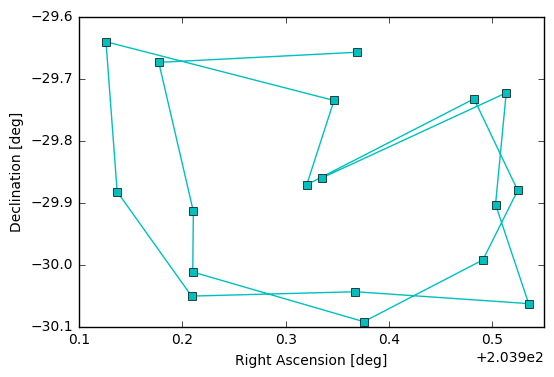

In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import itertools
import math
import random
import matplotlib.pyplot as plt


ra='13 37 00'
dec='-29 51 56.74'
ra_dec=SkyCoord('%s %s'%(ra, dec), unit=(u.hourangle,u.deg))
big_offset=0.5*u.deg
small_offset=0.1*u.deg
loop=18

def dither_dice9(ra_dec, big_offset,small_offset=0*u.arcsec, loop=9, plot=False):
    if not isinstance(big_offset,u.Quantity):
        big_offset=big_offset*u.arcsec
    if not isinstance(small_offset,u.Quantity):
        small_offset=small_offset*u.arcsec
    ra=ra_dec.ra
    dec=ra_dec.dec
    number=math.ceil(loop/9.0)
    big=((0.5*2**0.5)*big_offset)*0.5  #0.5*2**0.5 is due to adjacent side in a right angle triangle (cos45)
    small= (small_offset*0.5)
    """Dither"""
    RA_list=[ra]
    DEC_list=[dec]
    for _ in itertools.repeat(None, number):
        ra1=ra+(big)
        RA_list.append(ra1)
        dec1=dec+(big)
        DEC_list.append(dec1)
        
        ra2=ra+(big)
        RA_list.append(ra2)
        DEC_list.append(dec)
        
        ra3=ra+(big)
        RA_list.append(ra3)
        dec3=dec-(big)
        DEC_list.append(dec3)
        
        RA_list.append(ra)
        dec4=dec-(big)
        DEC_list.append(dec4)
        
        ra5=ra-(big)
        RA_list.append(ra5)
        dec5=dec-(big)
        DEC_list.append(dec5)
        
        ra6=ra-(big)
        RA_list.append(ra6)
        DEC_list.append(dec)
        
        ra7=ra-(big)
        RA_list.append(ra7)
        dec7=dec+(big)
        DEC_list.append(dec7)
        
        RA_list.append(ra)
        dec8=dec+(big)
        DEC_list.append(dec8)
        
        
        RA_list.append(ra)
        DEC_list.append(dec)
        
    
    
    RA_final_list=RA_list[:loop]
    DEC_final_list=DEC_list[:loop]
    """Random"""
    LISTra=[]
    LISTdec=[]
    for i in range(0,len(RA_final_list)):
        RA_offset=random.uniform(RA_final_list[i]-(small),RA_final_list[i]+(small))
        LISTra.append(RA_offset)
        DEC_offset=random.uniform(DEC_final_list[i]-(small),DEC_final_list[i]+(small))
        LISTdec.append(DEC_offset)
    All=SkyCoord(LISTra,LISTdec)
    print (All)
    if plot==True:
        plt.plot(All.ra, All.dec,'c-s')
        plt.ylabel('Declination [deg]')
        plt.xlabel('Right Ascension [deg]')
        plt.show()
    return All

All9=dither_dice9(ra_dec,big_offset, small_offset,loop, True)

# LOOPING DICE-5

- DITHER: This creates a square of 4 points around the central designated point
- RANDOM: The random selection in a small region around the designated points in the dither list such that no point is selected twice, to produce a more accurate image.
- REQUIRED: 
 - ra_dec: a RA and DEC created using 'SkyCoord'
 - big_offset: an offset for how far around the point you would like to dither. Default is 30*u.arcsec.
 - small_offset: an offset for the defined small region around the points defined in the dither list. Default is 0*u.arcsec
 - loop: a loop for how many times you would like to dither with the DICE_5 pattern. Default is 5 loop.
 - plot: a True or False input to say if user would like to plot coordinates. Default is False (no plot)
- RETURNS: 'SkyCoord' as a list and a plot of coordinate positions

#### - Example: dither_dice9(ra_dec='13 37 00' , '-29 51 56.74' [in SkyCoords], big_offset=0.5\*u.deg, small_offset=0.1\*u.deg, loop=10, plot=True)

<SkyCoord (ICRS): (ra, dec) in deg
    [(204.28928759, -29.84752421), (204.43075083, -29.72712271),
     (204.40356385, -30.02232964), (204.09684527, -30.03469319),
     (204.03039248, -29.69417253), (204.21767816, -29.88458548),
     (204.45741063, -29.6807344), (204.45572415, -30.08902747),
     (204.10526752, -30.02467366), (204.09358985, -29.64960718)]>


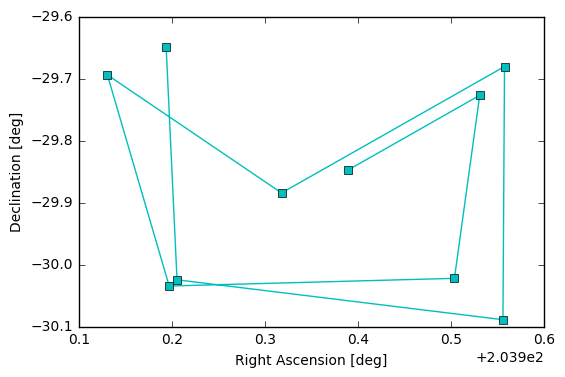

In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
import math
import itertools
import matplotlib.pyplot as plt

ra='13 37 00'
dec='-29 51 56.74'
ra_dec=SkyCoord('%s %s'%(ra, dec), unit=(u.hourangle,u.deg))
big_offset=0.5*u.deg
small_offset=0.1*u.deg
loop=10


def dither_dice5(ra_dec, big_offset,small_offset=0*u.arcsec, loop=5, plot=False):
    if not isinstance(big_offset,u.Quantity):
        big_offset=big_offset*u.arcsec
    if not isinstance(small_offset,u.Quantity):
        small_offset=small_offset*u.arcsec
    ra=ra_dec.ra
    dec=ra_dec.dec
    number=math.ceil(loop/5.0)
    big=((0.5*2**0.5)*big_offset)*0.5  #0.5*2**0.5 is due to adjacent side in a right angle triangle (cos45)
    small= (small_offset*0.5)
    """Dither"""
    RA_list=[ra]
    DEC_list=[dec]
    for _ in itertools.repeat(None, number):
        ra1=ra+(big)
        RA_list.append(ra1)
        dec1=dec+(big)
        DEC_list.append(dec1)
        
        ra2=ra+(big)
        RA_list.append(ra2)
        dec2=dec-(big)
        DEC_list.append(dec2)
        
        ra3=ra-(big)
        RA_list.append(ra3)
        dec3=dec-(big)
        DEC_list.append(dec3)
        
        ra4=ra-(big)
        RA_list.append(ra4)
        dec4=dec+(big)
        DEC_list.append(dec4)
        
        RA_list.append(ra)
        DEC_list.append(dec)
        
    
    RA_final_list=RA_list[:loop]
    DEC_final_list=DEC_list[:loop]
    """Random"""
    LISTra=[]
    LISTdec=[]
    for i in range(0,len(RA_final_list)):
        RA_offset=random.uniform(RA_final_list[i]-(small),RA_final_list[i]+(small))
        LISTra.append(RA_offset)
        DEC_offset=random.uniform(DEC_final_list[i]-(small),DEC_final_list[i]+(small))
        LISTdec.append(DEC_offset)
    All=SkyCoord(LISTra,LISTdec)
    print (All)
    if plot==True:
        plt.plot(All.ra, All.dec,'c-s')
        plt.ylabel('Declination [deg]')
        plt.xlabel('Right Ascension [deg]')
        plt.show()
    return All

All5=dither_dice5(ra_dec,big_offset, small_offset,loop, True)